In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
transcripts_folder = "/mnt/data-poseidon/kshitij/Speaker-recognition/VCTK-Corpus/txt/"      #108 folders
wav_folder = "/mnt/data-poseidon/kshitij/Speaker-recognition/VCTK-Corpus/wav48/"            #109 folders    

In [3]:
dataframe = {
    "file":[],
    "text":[],
    "speaker_id":[],
    # "content_id":[]
}
persons = os.listdir(transcripts_folder) 

for id in persons:      #id = p225
    id_folder_transcript = os.listdir(os.path.join(transcripts_folder,id)) 
        
    for files in id_folder_transcript:      #files = p225_001.txt
        dataframe["text"].append(open(os.path.join(transcripts_folder,id,files)).read().strip())
        dataframe["file"].append(f"{wav_folder}/{id}/{files.split('.')[0]}.wav")
        dataframe["speaker_id"].append(f"{id}")
        # dataframe["content_id"].append(f"{files.split('_')[-1].split('.')[0]}")
    
    

In [4]:
df = pd.DataFrame.from_dict(dataframe)
df

,file,text,speaker_id
0,/mnt/data-poseidon/kshitij/Speaker-recognition...,The council has proposed a temporary barrier t...,p254
1,/mnt/data-poseidon/kshitij/Speaker-recognition...,It was a great achievement to win at Wembley.,p254
2,/mnt/data-poseidon/kshitij/Speaker-recognition...,There is a lack of chemistry.,p254
3,/mnt/data-poseidon/kshitij/Speaker-recognition...,He was a crazy man.,p254
4,/mnt/data-poseidon/kshitij/Speaker-recognition...,The appeal tribunal will give its decision at ...,p254
...,...,...,...
44065,/mnt/data-poseidon/kshitij/Speaker-recognition...,It was like someone had died.),p259
44066,/mnt/data-poseidon/kshitij/Speaker-recognition...,The Farmer wants a new campaign.),p259
44067,/mnt/data-poseidon/kshitij/Speaker-recognition...,It has to solve the nuclear waste disposal pro...,p259
44068,/mnt/data-poseidon/kshitij/Speaker-recognition...,You are like an animal.),p259


In [5]:
def normalize(z):
    return z.split(".")[0].lower()
df.text = df.text.map(normalize)

In [6]:
df.iloc[0].text

'the council has proposed a temporary barrier to protect the monument'

In [7]:
# df['content_id'] = df['file'].apply(lambda x: x.split('_')[-1].split('.')[0])

In [8]:
df

,file,text,speaker_id
0,/mnt/data-poseidon/kshitij/Speaker-recognition...,the council has proposed a temporary barrier t...,p254
1,/mnt/data-poseidon/kshitij/Speaker-recognition...,it was a great achievement to win at wembley,p254
2,/mnt/data-poseidon/kshitij/Speaker-recognition...,there is a lack of chemistry,p254
3,/mnt/data-poseidon/kshitij/Speaker-recognition...,he was a crazy man,p254
4,/mnt/data-poseidon/kshitij/Speaker-recognition...,the appeal tribunal will give its decision at ...,p254
...,...,...,...
44065,/mnt/data-poseidon/kshitij/Speaker-recognition...,it was like someone had died,p259
44066,/mnt/data-poseidon/kshitij/Speaker-recognition...,the farmer wants a new campaign,p259
44067,/mnt/data-poseidon/kshitij/Speaker-recognition...,it has to solve the nuclear waste disposal pro...,p259
44068,/mnt/data-poseidon/kshitij/Speaker-recognition...,you are like an animal,p259


In [9]:
content_counts = df['text'].value_counts()
frequent_texts = content_counts[content_counts >= 4].index
# print(frequent_texts)
filtered_df = df[df['text'].isin(frequent_texts)]

In [10]:
filtered_df

,file,text,speaker_id
0,/mnt/data-poseidon/kshitij/Speaker-recognition...,the council has proposed a temporary barrier t...,p254
2,/mnt/data-poseidon/kshitij/Speaker-recognition...,there is a lack of chemistry,p254
3,/mnt/data-poseidon/kshitij/Speaker-recognition...,he was a crazy man,p254
4,/mnt/data-poseidon/kshitij/Speaker-recognition...,the appeal tribunal will give its decision at ...,p254
5,/mnt/data-poseidon/kshitij/Speaker-recognition...,the project has already secured the support of...,p254
...,...,...,...
44065,/mnt/data-poseidon/kshitij/Speaker-recognition...,it was like someone had died,p259
44066,/mnt/data-poseidon/kshitij/Speaker-recognition...,the farmer wants a new campaign,p259
44067,/mnt/data-poseidon/kshitij/Speaker-recognition...,it has to solve the nuclear waste disposal pro...,p259
44068,/mnt/data-poseidon/kshitij/Speaker-recognition...,you are like an animal,p259


In [11]:
# df.groupby('text').sum()

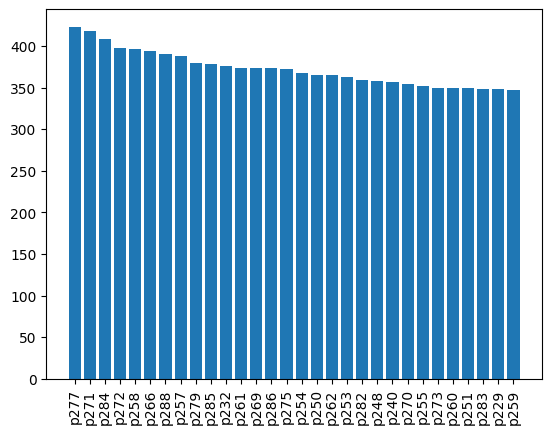

In [12]:
# plt.figure(figsize=(16, 6))
count_perspeaker = filtered_df.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)

In [13]:
# speaker_list = [int(i) for i in speaker_list]
print(speaker_list.__len__())
train_data = filtered_df[filtered_df.speaker_id.isin(speaker_list)]
print(len(train_data))

30
11179


In [14]:
train_data

,file,text,speaker_id
0,/mnt/data-poseidon/kshitij/Speaker-recognition...,the council has proposed a temporary barrier t...,p254
2,/mnt/data-poseidon/kshitij/Speaker-recognition...,there is a lack of chemistry,p254
3,/mnt/data-poseidon/kshitij/Speaker-recognition...,he was a crazy man,p254
4,/mnt/data-poseidon/kshitij/Speaker-recognition...,the appeal tribunal will give its decision at ...,p254
5,/mnt/data-poseidon/kshitij/Speaker-recognition...,the project has already secured the support of...,p254
...,...,...,...
44065,/mnt/data-poseidon/kshitij/Speaker-recognition...,it was like someone had died,p259
44066,/mnt/data-poseidon/kshitij/Speaker-recognition...,the farmer wants a new campaign,p259
44067,/mnt/data-poseidon/kshitij/Speaker-recognition...,it has to solve the nuclear waste disposal pro...,p259
44068,/mnt/data-poseidon/kshitij/Speaker-recognition...,you are like an animal,p259


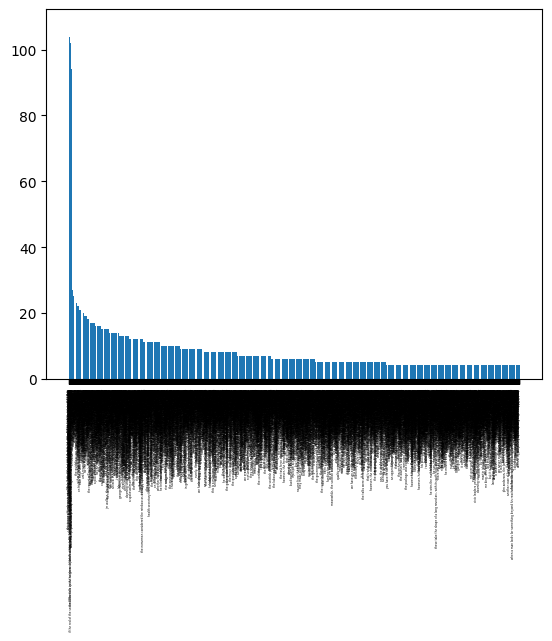

In [17]:
# plt.figure(figsize=(16, 6))
count_text = filtered_df.groupby('text').size().sort_values(ascending=False)
speaker_list = [str(i) for i in count_text.index]
_=plt.bar(x = speaker_list, height = count_text.values)
_=plt.xticks(rotation=90, fontsize=2)

In [18]:
count_text

text
to the hebrews it was a token that there would be no more universal floods                               107
ask her to bring these things with her from the store                                                    106
people look, but no one ever finds it                                                                    105
the rainbow is a division of white light into many beautiful colors                                      105
this is a very common type of bow, one showing mainly red and yellow, with little or no green or blue    105
                                                                                                        ... 
why is that?                                                                                               4
why is this?                                                                                               4
within six minutes, they were two goals down                                                               4
without approv

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your DataFrame (assuming it's already loaded as df)

# # Count occurrences of each content_id
# content_counts = train_data['content_id'].value_counts()

# # Plot
# plt.figure(figsize=(12, 6))
# content_counts.plot(kind='bar')
# plt.xlabel('Content ID')
# plt.ylabel('Count')
# plt.title('Distribution of Content IDs')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


In [16]:
# content_counts = train_data['content_id'].value_counts()
# rare_content_ids = content_counts[content_counts > 25].index
# num_rows = train_data[train_data['content_id'].isin(rare_content_ids)].shape[0]
# num_rows

In [17]:
text_counts = train_data.groupby('text').size()

In [18]:
(text_counts == 30).sum()


np.int64(13)

In [19]:
print(train_data.iloc[0].file)
print(train_data.iloc[0].text)

/mnt/data-poseidon/kshitij/Speaker-recognition/VCTK-Corpus/wav48//p254/p254_214.wav
the council has proposed a temporary barrier to protect the monument


In [20]:
# train_data

In [22]:
## For copying only relevant audio files:
import shutil

output_audio_path = "/mnt/data-poseidon/kshitij/Speaker-recognition/useful_audio/"
for i, example in train_data.iterrows():
    audio_file_src = example['file']
    shutil.copy(audio_file_src,output_audio_path+audio_file_src.split('/')[-1])

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize empty lists to store splits
train_list, dev_list, test_list = [], [], []

# Iterate over each speaker and split their utterances
for speaker, group in train_data.groupby("speaker_id"):
    train, temp = train_test_split(group, test_size=0.10, random_state=42)  # 90% train, 10% temp
    dev, test = train_test_split(temp, test_size=0.5, random_state=42)  # 5% dev, 5% test 
    
    train_list.append(train)
    dev_list.append(dev)
    test_list.append(test)

# Concatenate all splits
train_df_loaded = pd.concat(train_list).reset_index(drop=True)
dev_df_loaded = pd.concat(dev_list).reset_index(drop=True)
test_df_loaded = pd.concat(test_list).reset_index(drop=True)

In [24]:

# Verify the sizes of each split
print(f"Train set: {len(train_df_loaded)} rows")
print(f"Dev set: {len(dev_df_loaded)} rows")
print(f"Test set: {len(test_df_loaded)} rows")

train_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_train.pkl")
dev_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_dev.pkl")
test_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_test.pkl")

Train set: 10050 rows
Dev set: 558 rows
Test set: 571 rows


30


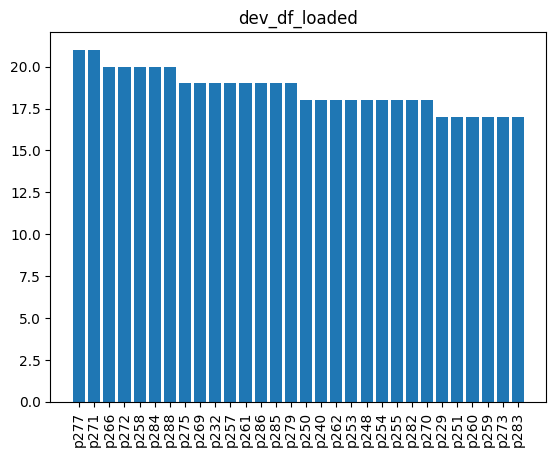

In [25]:
# plt.figure(figsize=(16, 6))
dev_df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_dev.pkl")
count_perspeaker = dev_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("dev_df_loaded")
print(len(speaker_list))

30


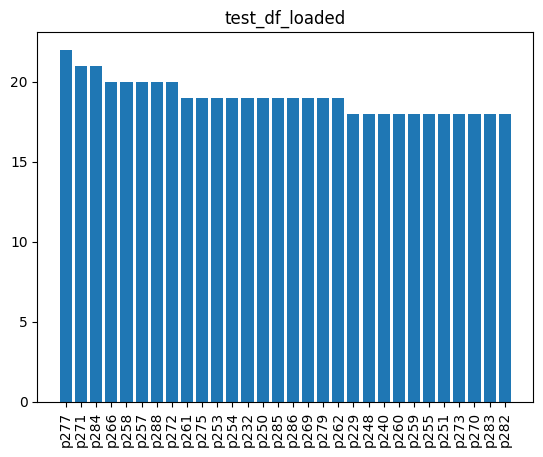

In [26]:
# plt.figure(figsize=(16, 6))
test_df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_test.pkl")
count_perspeaker = test_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("test_df_loaded")
print(len(speaker_list))

30


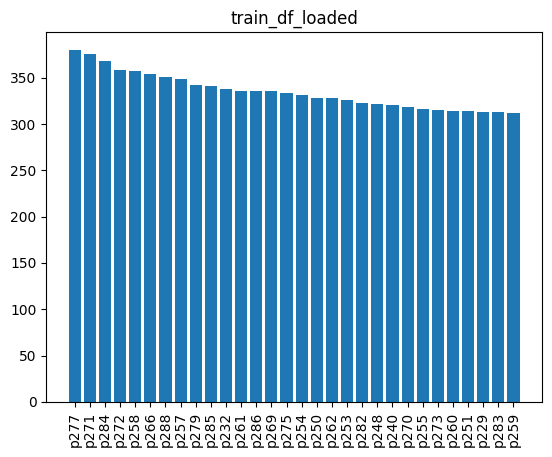

In [27]:
# plt.figure(figsize=(16, 6))
train_df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_train.pkl")
count_perspeaker = train_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("train_df_loaded")
print(len(speaker_list))

In [28]:
import os
import shutil
import pandas as pd

# dev_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-poseidon/kshitij/Speaker-recognition/dev_wav"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in dev_df_loaded.iterrows():
    source_path = row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.copy(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")


In [29]:
import os
import shutil
import pandas as pd

# test_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-poseidon/kshitij/Speaker-recognition/test_wav"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in test_df_loaded.iterrows():
    source_path = row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.copy(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")


In [30]:
import os
import shutil
import pandas as pd

# train_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-poseidon/kshitij/Speaker-recognition/train_wav"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in train_df_loaded.iterrows():
    source_path = row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.copy(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")


Text(0.5, 1.0, 'train_df_loaded')

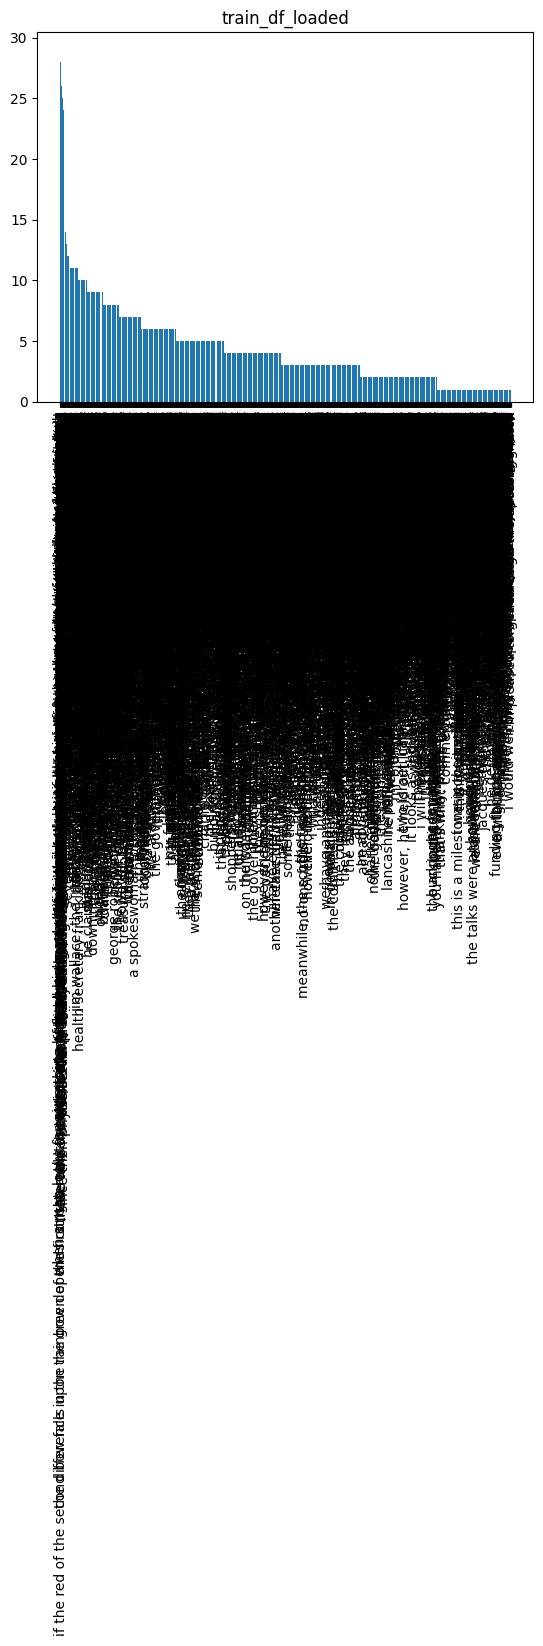

In [20]:
# plt.figure(figsize=(16, 6))
train_df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_train.pkl")
count_perspeaker = train_df_loaded.groupby('text').size().sort_values(ascending=False)#[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("train_df_loaded")
# print(len(speaker_list))

In [25]:
import pandas as pd

# Load the dataset
# train_df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/vctk/30_class_train.pkl")

# Count occurrences of each unique text
count_per_text = train_df_loaded.groupby('text').size()

total = 0
for i in range(40):

    single_occurrence_texts = count_per_text[count_per_text == i].index
    total_single_occurrences = train_df_loaded[train_df_loaded['text'].isin(single_occurrence_texts)].shape[0]
    total+=total_single_occurrences
    print(f"Total number of examples where text appears only {i} times: {total_single_occurrences}")
total

Total number of examples where text appears only 0 times: 0
Total number of examples where text appears only 1 times: 383
Total number of examples where text appears only 2 times: 802
Total number of examples where text appears only 3 times: 1224
Total number of examples where text appears only 4 times: 1180
Total number of examples where text appears only 5 times: 1260
Total number of examples where text appears only 6 times: 1080
Total number of examples where text appears only 7 times: 805
Total number of examples where text appears only 8 times: 672
Total number of examples where text appears only 9 times: 738
Total number of examples where text appears only 10 times: 480
Total number of examples where text appears only 11 times: 418
Total number of examples where text appears only 12 times: 204
Total number of examples where text appears only 13 times: 91
Total number of examples where text appears only 14 times: 56
Total number of examples where text appears only 15 times: 30
Tot

10050